# Import dataset 

In [57]:
import pandas as pd
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [58]:
df_test = pd.read_csv('Test_Set/Test_Set/RFMiD_Testing_Labels.csv')
df_train = pd.read_csv('Training_Set/RFMiD_Training_Labels.csv')
df_evaluation = pd.read_csv('Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [59]:
df_test.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
df_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df_evaluation.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,CSR,ODC,CRVO,TV,AH,ODP,ODE,ST,AION,PT,RT,RS,CRS,EDN,RPEC,MHL,RP,CWS,CB,ODPM,PRH,MNF,HR,CRAO,TD,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# chercher les colonnes qui ont que des 0
pd.set_option('display.max_columns', None)
for column in df_test.columns[1:]:  # Commencez à partir de la deuxième colonne pour exclure 'ID'
    unique_values = df_test[column].unique()
    print(f'Colonne {column}: {unique_values}')

Colonne Disease_Risk: [1 0]
Colonne DR: [1 0]
Colonne ARMD: [0 1]
Colonne MH: [0 1]
Colonne DN: [0 1]
Colonne MYA: [0 1]
Colonne BRVO: [0 1]
Colonne TSLN: [1 0]
Colonne ERM: [0 1]
Colonne LS: [0 1]
Colonne MS: [0 1]
Colonne CSR: [0 1]
Colonne ODC: [0 1]
Colonne CRVO: [0 1]
Colonne TV: [0 1]
Colonne AH: [0 1]
Colonne ODP: [0 1]
Colonne ODE: [0 1]
Colonne ST: [0 1]
Colonne AION: [0 1]
Colonne PT: [0 1]
Colonne RT: [0 1]
Colonne RS: [0 1]
Colonne CRS: [0 1]
Colonne EDN: [0 1]
Colonne RPEC: [0 1]
Colonne MHL: [0 1]
Colonne RP: [0 1]
Colonne CWS: [0 1]
Colonne CB: [0 1]
Colonne ODPM: [0]
Colonne PRH: [0 1]
Colonne MNF: [0]
Colonne HR: [0 1]
Colonne CRAO: [0]
Colonne TD: [0 1]
Colonne CME: [0 1]
Colonne PTCR: [0]
Colonne CF: [0 1]
Colonne VH: [0 1]
Colonne MCA: [0]
Colonne VS: [0]
Colonne BRAO: [0]
Colonne PLQ: [0]
Colonne HPED: [0]
Colonne CL: [0 1]


In [61]:
##### drop les colonnes qui ont que des 0 ##########
# Liste des noms de colonnes à supprimer
columns_to_drop = ['HPED', 'PLQ', 'BRAO', 'VS', 'MCA', 'PTCR', 'MNF', 'CRAO', 'ODPM']

# Supprimez les colonnes
df_test.drop(columns=columns_to_drop, inplace=True)

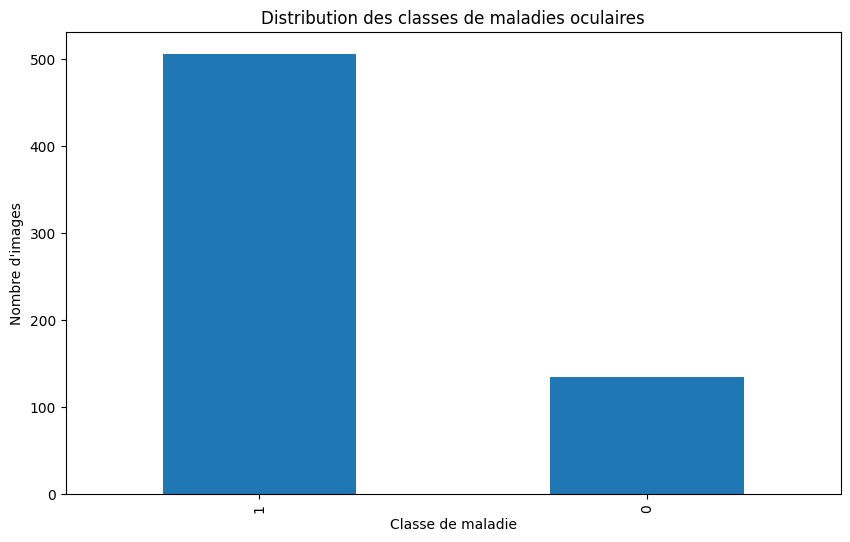

In [62]:
# Comptez le nombre d'images par classe
class_counts = df_test['Disease_Risk'].value_counts()

# Tracer le diagramme à barres
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribution des classes de maladies oculaires')
plt.xlabel('Classe de maladie')
plt.ylabel('Nombre d\'images')
plt.show()

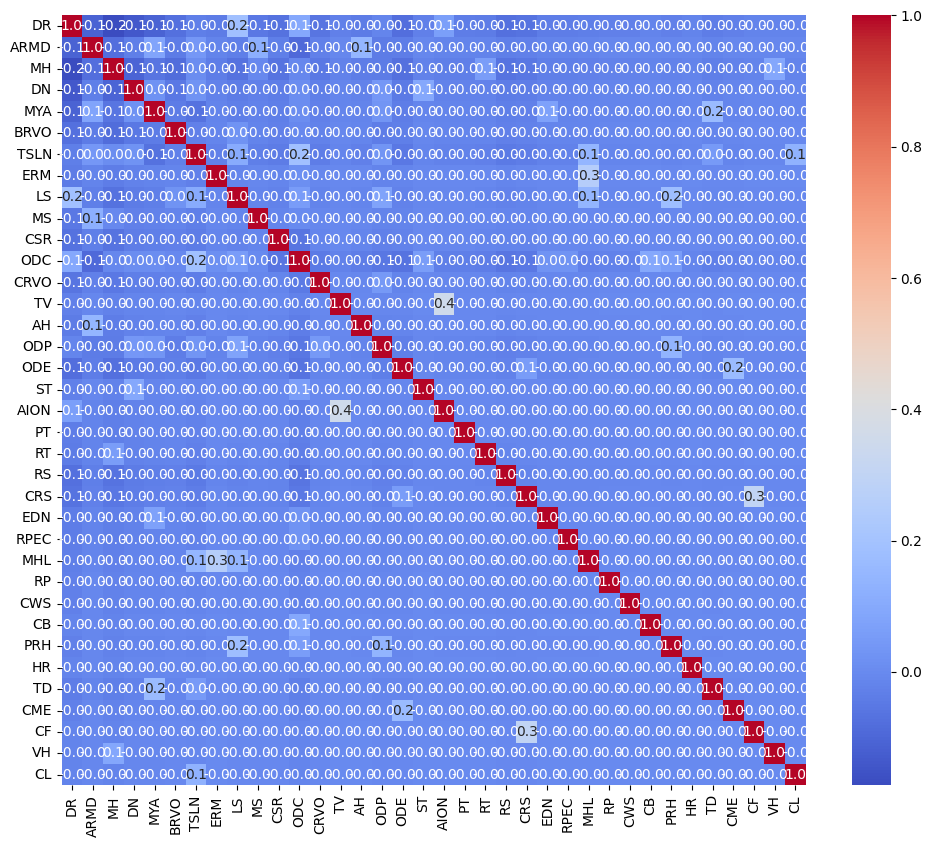

In [63]:
# Exclure les deux premières colonnes (ID et Disease_Risk) pour la matrice de corrélation
correlation_df = df_test.iloc[:, 2:].astype(float)

# Calculer la matrice de corrélation
correlation_matrix = correlation_df.corr()

# Créer une figure
plt.figure(figsize=(12, 10))

# Tracer la matrice de corrélation sous forme de carte de chaleur
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

# Afficher le graphique
plt.show()

In [65]:
# Seuil de corrélation (par exemple, 0.6)
correlation_threshold = 0.6

# Trouver les paires de colonnes corrélées
correlated_pairs = {}
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation_value = correlation_matrix.iloc[i, j]
        
        if abs(correlation_value) > correlation_threshold:
            correlated_pairs[(col1, col2)] = correlation_value

# Afficher les paires de colonnes corrélées
for pair, correlation_value in correlated_pairs.items():
    print(f"Corrélation entre {pair[0]} et {pair[1]} : {correlation_value:.2f}")

In [68]:
df_test_cleaned = df_test.copy()

In [71]:
df_test_cleaned['ID'] = df_test['ID'].astype(str) + '.png'

In [70]:
df_test_cleaned.head()


(640, 38)

In [74]:
df_test_cleaned = df_test_cleaned.astype(str)

In [75]:
df_test_cleaned.to_csv("test_cleaned.csv")

In [27]:
# Créez une liste pour stocker les images
images = []

# Load and store all images
for ID in df_test['ID']:
    image_test_path = os.path.join('/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Test_Set/Test_Set/Test', f'{ID}.png')
    image = Image.open(image_test_path)
    images.append(image)

# Choose the image index you want to display
image_index = 2  # Change the index as needed

# Display the chosen image
plt.imshow(images[image_index-1])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Test_Set/Test_Set/Test/1.png'

In [ ]:
#code pour tester tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

# Générer des données aléatoires pour l'exemple
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Création du modèle
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplatir les images
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2990 - accuracy: 0.9143 - val_loss: 0.1440 - val_accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1467 - accuracy: 0.9561 - val_loss: 0.1071 - val_accuracy: 0.9693
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1111 - accuracy: 0.9666 - val_loss: 0.0860 - val_accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0910 - accuracy: 0.9721 - val_loss: 0.0828 - val_accuracy: 0.9749
Epoch 5/5
313/313 [==============================] - 0s 602us/step - loss: 0.0732 - accuracy: 0.9768
Test accuracy: 0.9768000245094299


# Prétraitement des Images

In [ ]:
# mettre toutes les images au même format (même si normalement c déjà le cas)
# Chemin vers le dossier contenant les images
image_folder = '/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Test_Set/Test_Set/Test'

# Liste pour stocker les images prétraitées
preprocessed_images = []

def preprocess_image(image_path, target_size=(224, 224)):
    # Charger l'image et redimensionner
    img = Image.open(image_path)
    img = img.resize(target_size)
    
    # Convertir en tableau NumPy et normaliser les pixels
    img_array = np.asarray(img) / 255.0
    
    return img_array

# Boucler sur les images et appliquer le prétraitement
for ID in df_test['ID']:
    image_path = os.path.join(image_folder, f'{ID}.png')
    preprocessed_image = preprocess_image(image_path)
    preprocessed_images.append(preprocessed_image)

# Convertir en tableau NumPy pour une manipulation plus facile
preprocessed_images = np.array(preprocessed_images)

# Vérifier la forme du tableau d'images prétraitées
print("Forme du tableau d'images prétraitées:", preprocessed_images.shape)

Forme du tableau d'images prétraitées: (640, 224, 224, 3)


In [ ]:
import os

# Function to load images and labels without relying on a CSV
def load_images_and_labels_from_folder(image_folder):
    images = []
    labels = []
    
    # Iterate through the folders in the image directory
    for label in os.listdir(image_folder):
        label_folder = os.path.join(image_folder, label)
        
        # Check if it's a directory
        if os.path.isdir(label_folder):
            for image_name in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_name)
                image = preprocess_image(image_path)  # Use your preprocessing function
                images.append(image)
                labels.append(label)
    
    return np.array(images), np.array(labels)

# Load the datasets directly from the image folders
X_train, y_train = load_images_and_labels_from_folder('/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Training_Set/Training_Set/Training')
X_validation, y_validation = load_images_and_labels_from_folder('/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Evaluation_Set/Evaluation_Set/Validation')
X_test, y_test = load_images_and_labels_from_folder('/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Test_Set/Test_Set/Test')

# Check the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of y_validation:", y_validation.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (0,)
Shape of y_train: (0,)
Shape of X_validation: (0,)
Shape of y_validation: (0,)
Shape of X_test: (0,)
Shape of y_test: (0,)


In [ ]:
# Path to the training CSV file and image folder
training_csv_path = "/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Training_Set/Training_Set/RFMiD_Training_Labels.csv"
training_image_folder = "/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Training_Set/Training_Set/Training"

# Load the training CSV
training_df = pd.read_csv(training_csv_path)

# Preprocess images and associate with labels
training_images = []
training_labels = []

for ID in training_df['ID']:
    image_path = os.path.join(training_image_folder, f'{ID}.png')
    preprocessed_image = preprocess_image(image_path)
    training_images.append(preprocessed_image)
    # Use the ID as the label
    training_labels.append(ID)

# Convert to NumPy arrays
training_images = np.array(training_images)
training_labels = np.array(training_labels)

# Check the shapes of the preprocessed data
print("Shape of preprocessed training images:", training_images.shape)
print("Shape of training labels:", training_labels.shape)


Shape of preprocessed training images: (1920, 224, 224, 3)
Shape of training labels: (1920,)


In [ ]:
# Path to the test CSV file and image folder
test_csv_path = "/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Test_Set/Test_Set/RFMiD_Testing_Labels.csv"
test_image_folder = "/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Test_Set/Test_Set/Test"

# Load the test CSV
test_df = pd.read_csv(test_csv_path)

# Preprocess images and associate with labels
test_images = []
test_labels = []

for ID in test_df['ID']:
    image_path = os.path.join(test_image_folder, f'{ID}.png')
    preprocessed_image = preprocess_image(image_path)
    test_images.append(preprocessed_image)
    # Use the ID as the label
    test_labels.append(ID)

# Convert to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Check the shapes of the preprocessed data
print("Shape of preprocessed test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

Shape of preprocessed test images: (640, 224, 224, 3)
Shape of test labels: (640,)


In [ ]:
# Path to the validation CSV file and image folder
validation_csv_path = "/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv"
validation_image_folder = "/Users/arianerousseau/Documents/Data_Camp/eyes-dataset/Evaluation_Set/Evaluation_Set/Validation"

# Load the validation CSV
validation_df = pd.read_csv(validation_csv_path)

# Preprocess images and associate with labels
validation_images = []
validation_labels = []

for ID in validation_df['ID']:
    image_path = os.path.join(validation_image_folder, f'{ID}.png')
    preprocessed_image = preprocess_image(image_path)
    validation_images.append(preprocessed_image)
    # Use the ID as the label
    validation_labels.append(ID)

# Convert to NumPy arrays
validation_images = np.array(validation_images)
validation_labels = np.array(validation_labels)

# Check the shapes of the preprocessed data
print("Shape of preprocessed validation images:", validation_images.shape)
print("Shape of validation labels:", validation_labels.shape)

Shape of preprocessed validation images: (640, 224, 224, 3)
Shape of validation labels: (640,)


In [ ]:
# X_train will be your preprocessed training images
X_train = training_images
y_train = training_labels
X_test = test_images
y_test = test_labels
X_validation = validation_images
y_validation = validation_labels

# Check the shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of y_validation:", y_validation.shape)

Shape of X_train: (1920, 224, 224, 3)
Shape of y_train: (1920,)
Shape of X_test: (640, 224, 224, 3)
Shape of y_test: (640,)
Shape of X_validation: (640, 224, 224, 3)
Shape of y_validation: (640,)


In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Define input shape and number of classes
input_shape = (224, 224, 3)  # Adjust this based on your preprocessed image shape
num_classes = 43  # Set the number of classes based on your dataset

# Create the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)

# Print the model summary
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 173056)           

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'],
                  run_eagerly=True)  # Add this line

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_validation_encoded = encoder.transform(y_validation)
y_test_encoded = encoder.transform(y_test)
